In [1]:
import os
import nltk
from nltk import *
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def parse_amazon_data_count_matrix(file_path, count_vect, training):
	'''
	This function parses amazon data. It retrieves the reviews and good/bad label.

	:param file_path: file_path: path to traing/testing files
			-./data/test.ft.txt
			-./data/train.ft.txt
	:param count_vect: vectorizer
	:param training: 1 if training data
					 0 if testing data
	:return:
		a sparse matrix w/ each row being a document and coluumn being a word
	'''

	review_str_list = []
	labels_list = []

	with open(file_path, 'r') as f:
		words = []
		for line in f:
			label_str, review_str = line.split(' ', 1)
			label = int(label_str[-1]) - 1  # original data is labeled with 1 and 2. change to labels of 0 and 1
			words = review_str

			# Not too sure what the best DS is here but gonna store everything in list for now
			review_str_list.append(words)
			labels_list.append(label)
            
	temp = list(zip(review_str_list, labels_list))
	random.shuffle(temp)
	review_str_list, labels_list = zip(*temp)

	if training:
		X_counts = count_vect.fit_transform(review_str_list)
	else:
		X_counts = count_vect.transform(review_str_list)

	return (X_counts, labels_list)

In [3]:
def parse_imdb_data_count_matrix(file_path, count_vect, training):
	'''

	:param file_path: path to training/testing files
			-./data/aclImdb/train
			-./data/aclImdb/test
	:param count_vect: vectorizer
	:param training: 1 if training data
					 0 if testing data
	:return:
		a sparse matrix w/ each row being a document and coluumn being a word
	'''

	review_str_list = []
	labels_list = []

	for folder_name in os.listdir(file_path):
		if folder_name == "pos":
			label = 1
		elif folder_name == "neg":
			label = 0
		else:
			# We are not interested in these data!!
			continue

		for file_name in os.listdir(file_path + "/" + folder_name):
			with open(file_path + "/" + folder_name + "/" + file_name, 'r', errors='ignore') as f:
				words = ""
				for line in f:
					words += " " + line
			review_str_list.append(words)
			labels_list.append(label)

	temp = list(zip(review_str_list, labels_list))
	random.shuffle(temp)
	review_str_list, labels_list = zip(*temp)
    
	if training:
		X_counts = count_vect.fit_transform(review_str_list)
	else:
		X_counts = count_vect.transform(review_str_list)

	return (X_counts, labels_list)

In [4]:
def naive_bayes(x, y):
	nb = MultinomialNB()
	nb = nb.fit(x, y)
	return nb

In [26]:
def run_naive_bayes(x_train, y_train, amazon_test_x, amazon_test_y, imdb_test_x, imdb_test_y):
	x = []
	training_score = []
	amazon_testing_score = []
	imdb_testing_score = []
	for i in range(1, x_train.shape[0], 10):
		x.append(i)
		nb = naive_bayes(x_train[:i], y_train[:i])
		training_label = nb.predict(x_train)
		training_pred_score = metrics.accuracy_score(y_train, training_label)
		training_score.append(training_pred_score)
		amazon_pred_label = nb.predict(amazon_test_x)
		amazon_score = metrics.accuracy_score(amazon_pred_label, amazon_test_y)
		amazon_testing_score.append(amazon_score)
		imdb_pred_label = nb.predict(imdb_test_x)
		imdb_score = metrics.accuracy_score(imdb_pred_label, imdb_test_y)
		imdb_testing_score.append(imdb_score)

# 	x = np.array(x)
# 	amazon_testing_score = np.array(amazon_testing_score)
# 	imdb_testing_score = np.array(imdb_testing_score)

# 	plt.plot(x, amazon_testing_score)
# 	plt.plot(x, imdb_testing_score)

# 	plt.legend(['Amazon testing accuracy', 'IMDB testing accuracy'], loc='upper left')
# 	plt.title('Amazon vs. IMDB testing accuracy')
# 	plt.ylabel('Accuracy')
# 	plt.xlabel('Training data size')
# 	plt.show()
    
	return (x, training_score, amazon_testing_score, imdb_testing_score)
    

In [6]:
training_amazon = "./data/train.ft.txt"
testing_amazon = "./data/test.ft.txt"
training_imdb = "./data/aclImdb/train"
testing_imdb = "./data/aclImdb/test"

In [7]:
print("train on amazon, test on imdb")

	# uncomment to run naive bayes
count_vect = CountVectorizer(stop_words='english')

amazon_training_x, amazon_training_y = parse_amazon_data_count_matrix(training_amazon, count_vect, 1)
print("loaded amazon training data")
amazon_testing_x, amazon_testing_y = parse_amazon_data_count_matrix(testing_amazon, count_vect, 0)
print("loaded amazon testing data")
imdb_testing_x, imdb_testing_y = parse_imdb_data_count_matrix(testing_imdb, count_vect, 0)
print("loaded imdb testing data")

train on amazon, test on imdb
loaded amazon training data
loaded amazon testing data
loaded imdb testing data


In [16]:
x, training_score, amazon_testing_score, imdb_testing_score = run_naive_bayes(amazon_training_x, amazon_training_y, amazon_testing_x, amazon_testing_y, imdb_testing_x, imdb_testing_y)

/usr/local/lib/python3.6/site-packages/sklearn/naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


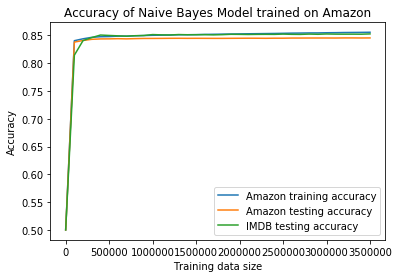

In [17]:
plt.plot(x, training_score)
plt.plot(x, amazon_testing_score)
plt.plot(x, imdb_testing_score)

plt.legend(['Amazon training accuracy', 'Amazon testing accuracy', 'IMDB testing accuracy'], loc='lower right')
plt.title('Accuracy of Naive Bayes Model trained on Amazon')
plt.ylabel('Accuracy')
plt.xlabel('Training data size')
plt.show()

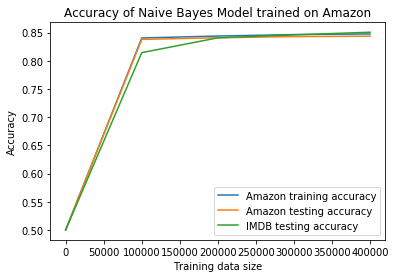

In [23]:
plt.plot(x[:5], training_score[:5])
plt.plot(x[:5], amazon_testing_score[:5])
plt.plot(x[:5], imdb_testing_score[:5])

plt.legend(['Amazon training accuracy', 'Amazon testing accuracy', 'IMDB testing accuracy'], loc='lower right')
plt.title('Accuracy of Naive Bayes Model trained on Amazon')
plt.ylabel('Accuracy')
plt.xlabel('Training data size')
plt.show()

In [19]:
nb1 = naive_bayes(amazon_training_x, amazon_training_y)
print("classifier trained")
amazon_train_label1 = nb1.predict(amazon_training_x)
print("amazon predictions made")
amazon_train_score1 = metrics.accuracy_score(amazon_train_label1, amazon_training_y)
print("amazon train score = " + str(amazon_train_score1))
amazon_pred_label1 = nb1.predict(amazon_testing_x)
print("amazon predictions made")
amazon_score1 = metrics.accuracy_score(amazon_pred_label1, amazon_testing_y)
print("amazon score = " + str(amazon_score1))
imdb_pred_label1 = nb1.predict(imdb_testing_x)
print("imdb predictions made")
imdb_score1 = metrics.accuracy_score(imdb_pred_label1, imdb_testing_y)
print("imdb score = " + str(imdb_score1))

classifier trained
amazon predictions made
amazon score = 0.8453575
imdb predictions made
imdb score = 0.85236


In [20]:
# train on imdb -> test on amazon
print("train on imdb, test on amazon")

# uncomment to run naive bayes
count_vect = CountVectorizer(stop_words='english')

imdb_training_x, imdb_training_y = parse_imdb_data_count_matrix(training_imdb, count_vect, 1)
print("loaded imdb training data")
imdb_testing_x, imdb_testing_y = parse_imdb_data_count_matrix(testing_imdb, count_vect, 0)
print("loaded imdb testing data")
amazon_testing_x, amazon_testing_y = parse_amazon_data_count_matrix(testing_amazon, count_vect, 0)
print("loaded amazon testing data")

train on imdb, test on amazon
loaded imdb training data
loaded imdb testing data
loaded amazon testing data


In [27]:
x1, training_score1, amazon_testing_score1, imdb_testing_score1 = run_naive_bayes(imdb_training_x, imdb_training_y, amazon_testing_x, amazon_testing_y, imdb_testing_x, imdb_testing_y)

/usr/local/lib/python3.6/site-packages/sklearn/naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


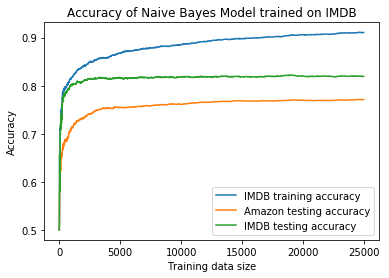

In [28]:
plt.plot(x1, training_score1)
plt.plot(x1, amazon_testing_score1)
plt.plot(x1, imdb_testing_score1)

plt.legend(['IMDB training accuracy', 'Amazon testing accuracy', 'IMDB testing accuracy'], loc='lower right')
plt.title('Accuracy of Naive Bayes Model trained on IMDB')
plt.ylabel('Accuracy')
plt.xlabel('Training data size')
plt.show()

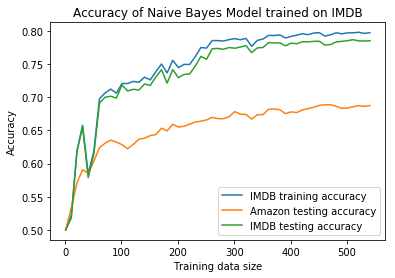

In [29]:
plt.plot(x1[:55], training_score1[:55])
plt.plot(x1[:55], amazon_testing_score1[:55])
plt.plot(x1[:55], imdb_testing_score1[:55])

plt.legend(['IMDB training accuracy', 'Amazon testing accuracy', 'IMDB testing accuracy'], loc='lower right')
plt.title('Accuracy of Naive Bayes Model trained on IMDB')
plt.ylabel('Accuracy')
plt.xlabel('Training data size')
plt.show()

In [76]:
nb2 = naive_bayes(imdb_training_x, imdb_training_y)
print("classifier trained")
imdb_train_pred_label2 = nb2.predict(imdb_training_x)
print("imdb predictions made")
imdb_train_score2 = metrics.accuracy_score(imdb_train_pred_label2, imdb_testing_y)
print("imdb score = " + str(imdb_train_score2))
imdb_pred_label2 = nb2.predict(imdb_testing_x)
print("imdb predictions made")
imdb_score2 = metrics.accuracy_score(imdb_pred_label2, imdb_testing_y)
print("imdb score = " + str(imdb_score2))
amazon_pred_label2 = nb2.predict(amazon_testing_x)
print("amazon predictions made")
amazon_score2 = metrics.accuracy_score(amazon_pred_label2, amazon_testing_y)
print("amazon score = " + str(amazon_score2))

classifier trained
imdb predictions made
imdb score = 0.81968
amazon predictions made
amazon score = 0.770955
